# Analisis de datos Exploratorio

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import Modulo as md
from importlib import reload
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## EDA a steam_games

In [17]:
df_games = pd.read_parquet('Datasets/parquet/steam_games.parquet')
df_games.head()

,genres,price,id,developer,app_name,release_year
0,Action,4.99,761140,Kotoshiro,Lost Summoner Kitty,2018
1,Casual,4.99,761140,Kotoshiro,Lost Summoner Kitty,2018
2,Indie,4.99,761140,Kotoshiro,Lost Summoner Kitty,2018
3,Simulation,4.99,761140,Kotoshiro,Lost Summoner Kitty,2018
4,Strategy,4.99,761140,Kotoshiro,Lost Summoner Kitty,2018


In [18]:
print(f'Cantidad de registros: {df_games.shape[0]}')
md.tipo_datos(df_games)

Cantidad de registros: 71551


,Columna,Tipo_datos,%_nulos,Nulos
0,genres,[str],0.0,0
1,price,[float],0.0,0
2,id,[str],0.0,0
3,developer,[str],0.0,0
4,app_name,[str],0.0,0
5,release_year,[int],0.0,0


Son 71551 registros, sin ningun nulo.

### Cantidad y rango de elementos

In [100]:
print(f'Cantidad de juegos: {df_games.id.unique().shape[0]}')

print(f'Cantidad de generos: {df_games.genres.unique().shape[0]}')

print(f'Cantidad de desarrolladores: {df_games.developer.unique().shape[0]}')

print(f'Rango de anios de juegos: {df_games[df_games.release_year!=0].release_year.min()} a {df_games.release_year.max()}')

print(f'Rango de precios: {df_games.price.min()} a {df_games.price.max()}')

Cantidad de juegos: 28850
Cantidad de generos: 22
Cantidad de desarrolladores: 10964
Rango de anios de juegos: 1983 a 2021
Rango de precios: 0.0 a 995.0


### Dispersion de variables

#### Genres

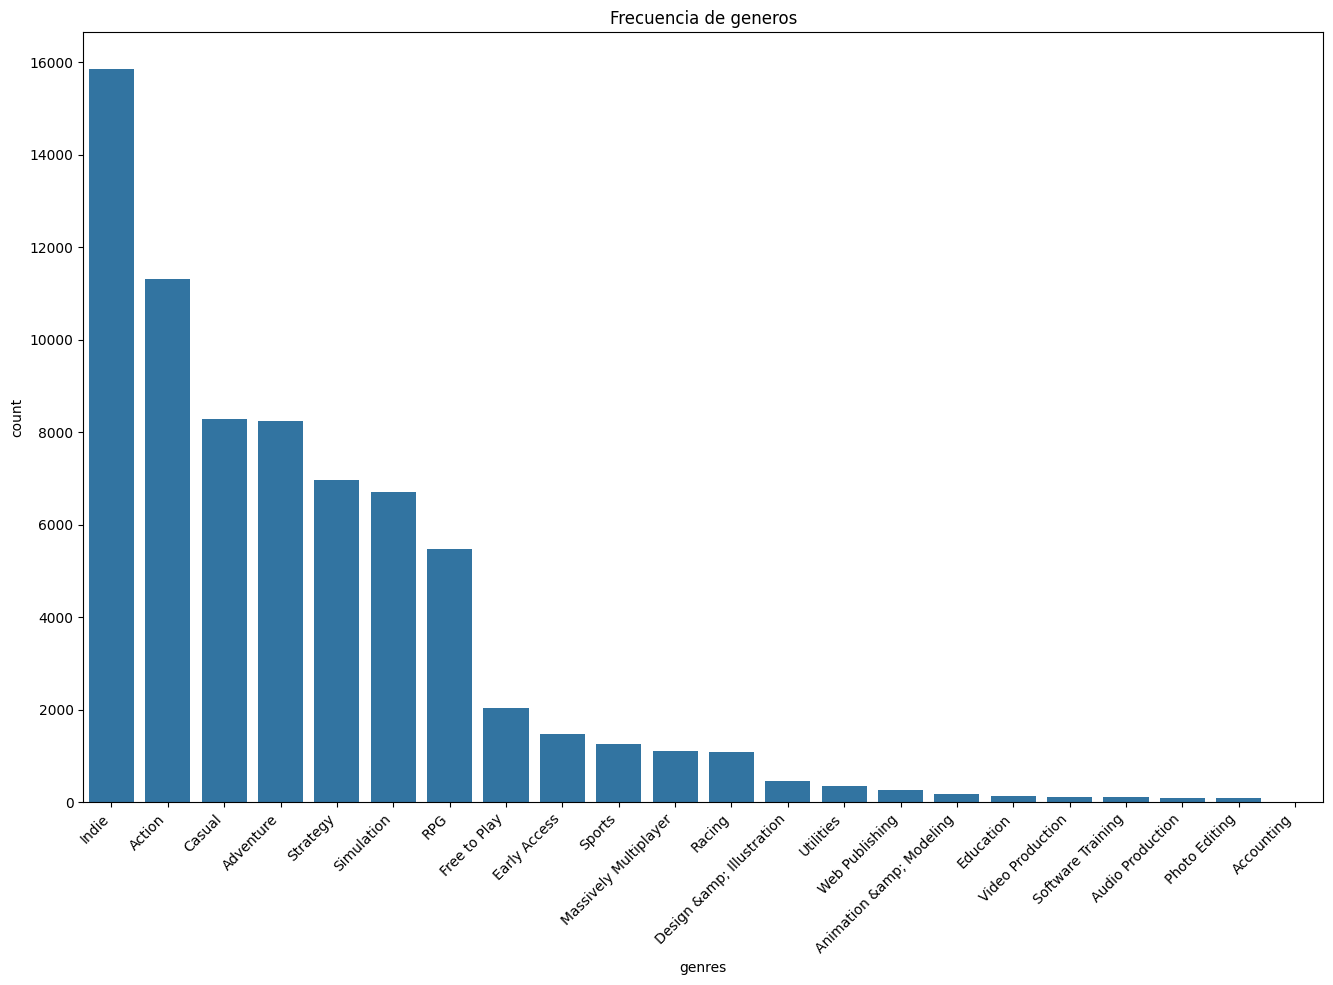

In [31]:
plt.figure(figsize=(16,10))
order = df_games.genres.value_counts().index
sns.countplot(data=df_games,x='genres',order=order)
plt.xticks(rotation=45,ha='right')
plt.title('Frecuencia de generos')
plt.show()

In [63]:
md.porcentaje_repr(df_games,'genres')

,Valor,Cantidad,Porcentaje
0,Indie,15858,22.16
1,Action,11319,15.82
2,Casual,8282,11.57
3,Adventure,8242,11.52
4,Strategy,6957,9.72
5,Simulation,6699,9.36
6,RPG,5479,7.66
7,Free to Play,2031,2.84
8,Early Access,1462,2.04
9,Sports,1257,1.76


#### Developer

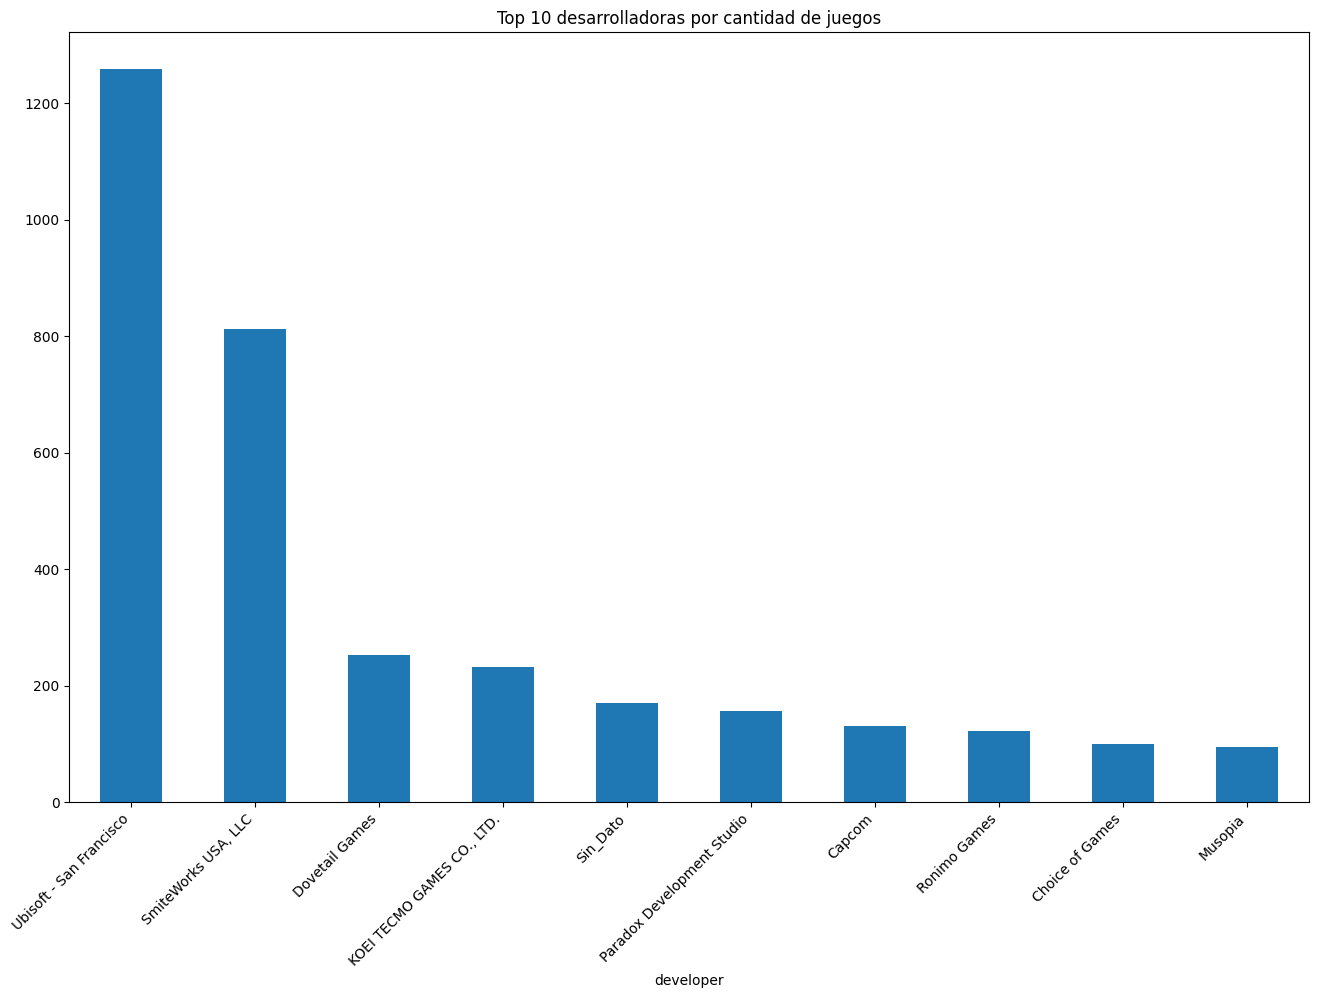

In [37]:
plt.figure(figsize=(16,10))
df_developers = df_games[['developer','id']].drop_duplicates()
conteo_developer = df_developers['developer'].value_counts()
conteo_developer[:10].plot(kind='bar')
plt.xticks(rotation=45,ha='right')
plt.title('Top 10 desarrolladoras por cantidad de juegos')
plt.show()

In [64]:
md.porcentaje_repr(df_developers,'developer')[:10]

,Valor,Cantidad,Porcentaje
0,Ubisoft - San Francisco,1259,4.36
1,"SmiteWorks USA, LLC",813,2.82
2,Dovetail Games,253,0.88
3,"KOEI TECMO GAMES CO., LTD.",232,0.80
4,Sin_Dato,170,0.59
5,Paradox Development Studio,156,0.54
6,Capcom,130,0.45
7,Ronimo Games,123,0.43
8,Choice of Games,100,0.35
9,Musopia,95,0.33


#### Release_year

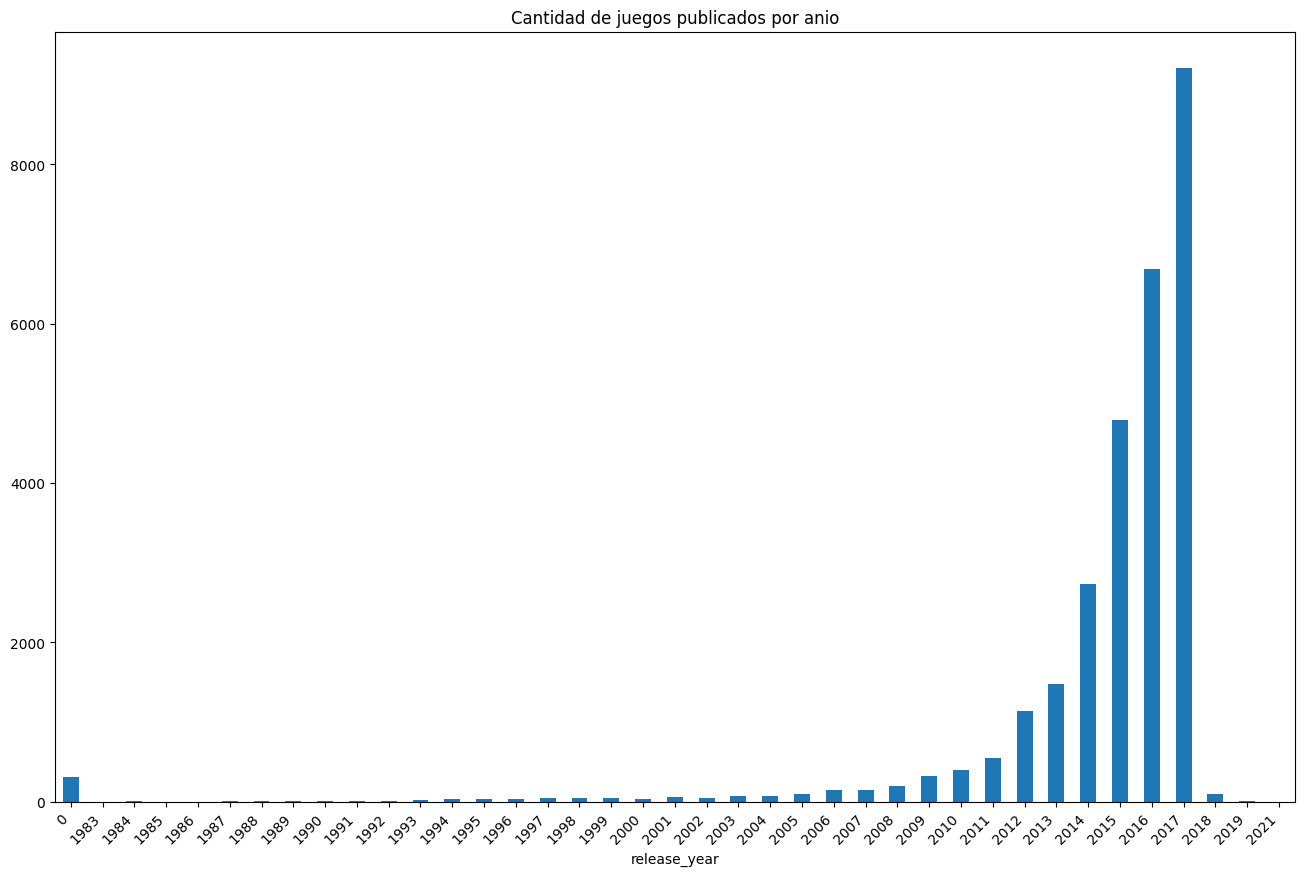

In [74]:
plt.figure(figsize=(16,10))
df_years = df_games[['release_year','id']].drop_duplicates()
conteo_year = df_years['release_year'].value_counts().sort_index()
conteo_year.plot(kind='bar')
plt.xticks(rotation=45,ha='right')
plt.title('Cantidad de juegos publicados por anio')
plt.show()

In [69]:
md.porcentaje_repr(df_years,'release_year')[:10]

,Valor,Cantidad,Porcentaje
0,2017,9207,31.91
1,2016,6691,23.19
2,2015,4794,16.62
3,2014,2728,9.46
4,2013,1477,5.12
5,2012,1137,3.94
6,2011,541,1.88
7,2010,393,1.36
8,2009,316,1.10
9,0,303,1.05


Vemos que hay un 1% de juegos que no tienen anio de lanzamiento y que la mayor cantidad de registros fue entre 2012 y 2017.

#### Price

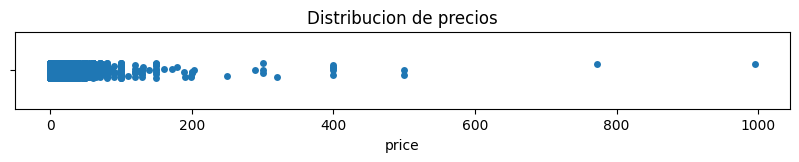

In [85]:
df_price = df_games[['price','release_year','id']].drop_duplicates()
plt.figure(figsize=(10,1))
sns.stripplot(data=df_price,x='price')
plt.title('Distribucion de precios')
plt.show()

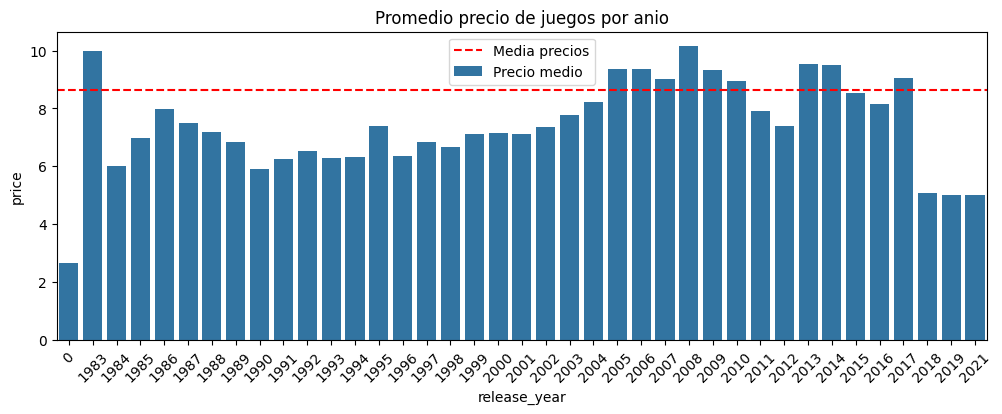

In [90]:
media = df_price.price.mean()
df_yprice = pd.DataFrame(df_price.groupby(['release_year'])['price'].mean())
plt.figure(figsize=(12,4))
sns.barplot(data=df_yprice,x='release_year',y='price',label='Precio medio')
plt.axhline(y=media, color='r', linestyle='--', label='Media precios')
plt.xticks(rotation=45)
plt.title('Promedio precio de juegos por anio')
plt.legend()
plt.show()

In [95]:
print(f'Porcentaje de juegos gratis: {df_price[df_price.price==0].shape[0]/df_price.price.shape[0]*100:.2f}%')
print(f'Porcentaje de juegos con costo menor a 10: {df_price[df_price.price<10].shape[0]/df_price.price.shape[0]*100:.2f}%')


Porcentaje de juegos gratis: 9.60%
Porcentaje de juegos con costo menor a 10: 79.62%


Se puede notar la influencia que tienen los precios bajos/gratis.

## EDA a user_reviews

In [101]:
df_reviews = pd.read_parquet('Datasets/parquet/user_reviews_sentiments.parquet')
df_reviews.head()

,user_id,item_id,recommend,posted,sentiment_analysis
0,76561197970982479,1250,True,"Posted November 5, 2011.",1
1,76561197970982479,22200,True,"Posted July 15, 2011.",2
2,76561197970982479,43110,True,"Posted April 21, 2011.",1
3,js41637,251610,True,"Posted June 24, 2014.",1
4,js41637,227300,True,"Posted September 8, 2013.",1


In [102]:
print(f'Cantidad de registros: {df_reviews.shape[0]}')
md.tipo_datos(df_reviews)

Cantidad de registros: 58431


,Columna,Tipo_datos,%_nulos,Nulos
0,user_id,[str],0.0,0
1,item_id,[str],0.0,0
2,recommend,[bool],0.0,0
3,posted,[str],0.0,0
4,sentiment_analysis,[int],0.0,0


In [108]:
print(f'Cantidad de users: {df_reviews.user_id.unique().shape[0]}')

print(f'Cantidad de registos: {df_reviews.shape[0]}')

print(f'Recomendaciones: {df_reviews.recommend[df_reviews.recommend == True].shape[0]}, un porcentaje sobre el total de {df_reviews.recommend[df_reviews.recommend == True].shape[0]/df_reviews.recommend.shape[0]*100:.2f}%')

print(f'Cantidad de items (juegos): {df_reviews.item_id.unique().shape[0]}')

print(f'Analisis de sentimientos:')

md.porcentaje_repr(df_reviews,'sentiment_analysis').sort_values('Valor').reset_index()

Cantidad de users: 25458
Cantidad de registos: 58431
Recomendaciones: 51692, un porcentaje sobre el total de 88.47%
Cantidad de items (juegos): 3682
Analisis de sentimientos:


,index,Valor,Cantidad,Porcentaje
0,2,0,5641,9.65
1,0,1,34326,58.75
2,1,2,18464,31.60


Vemos que tenemos 3.682 juegos vs. los 28.850 juego existentes en steam_games.. esto quiere decir que hay mas de 20.000 juegos no puntuados.

Ademas, tenemos un 58% de resenias neutrales, un 31% positivas y un 10% negativas.

Veamos como se relacionan ambas variables juntas:

In [117]:
df_sar = df_reviews.groupby(['sentiment_analysis','recommend'])
result = pd.DataFrame({'Cantidad':df_sar.size(),'Porcentaje':round(df_sar.size()/df_reviews.shape[0]*100,2)})
result


Cantidad  Porcentaje
sentiment_analysis recommend                      
0                  False          1803        3.09
                   True           3838        6.57
1                  False          4262        7.29
                   True          30064       51.45
2                  False           674        1.15
                   True          17790       30.45

Este analisis denota que hay veces los comentarios son escuetos, simplificando los mismos pero de todos modos recomendando el juego.

## EDA a users_items

In [119]:
df_items = pd.read_parquet('Datasets/parquet/users_items.parquet')
df_items.head()

,user_id,steam_id,item_id,item_name,playtime_forever
0,76561197970982479,76561197970982479,10,Counter-Strike,6
1,76561197970982479,76561197970982479,20,Team Fortress Classic,0
2,76561197970982479,76561197970982479,30,Day of Defeat,7
3,76561197970982479,76561197970982479,40,Deathmatch Classic,0
4,76561197970982479,76561197970982479,50,Half-Life: Opposing Force,0


In [120]:
print(f'Cantidad de registros: {df_items.shape[0]}')
md.tipo_datos(df_items)

Cantidad de registros: 5094105


,Columna,Tipo_datos,%_nulos,Nulos
0,user_id,[str],0.0,0
1,steam_id,[str],0.0,0
2,item_id,[str],0.0,0
3,item_name,[str],0.0,0
4,playtime_forever,[int],0.0,0


In [126]:
print(f'Cantidad de users: {df_items.user_id.unique().shape[0]}')

print(f'Cantidad de items (juegos): {df_items.item_id.unique().shape[0]}')

print(f'Cantidad de horas totales jugadas: {df_items.playtime_forever.sum()}, equivalente en anios: {round(df_items.playtime_forever.sum()/(24*365),1)}')

Cantidad de users: 70912
Cantidad de items (juegos): 10978
Cantidad de horas totales jugadas: 5045971286, equivalente en anios: 576024.1


### User_id

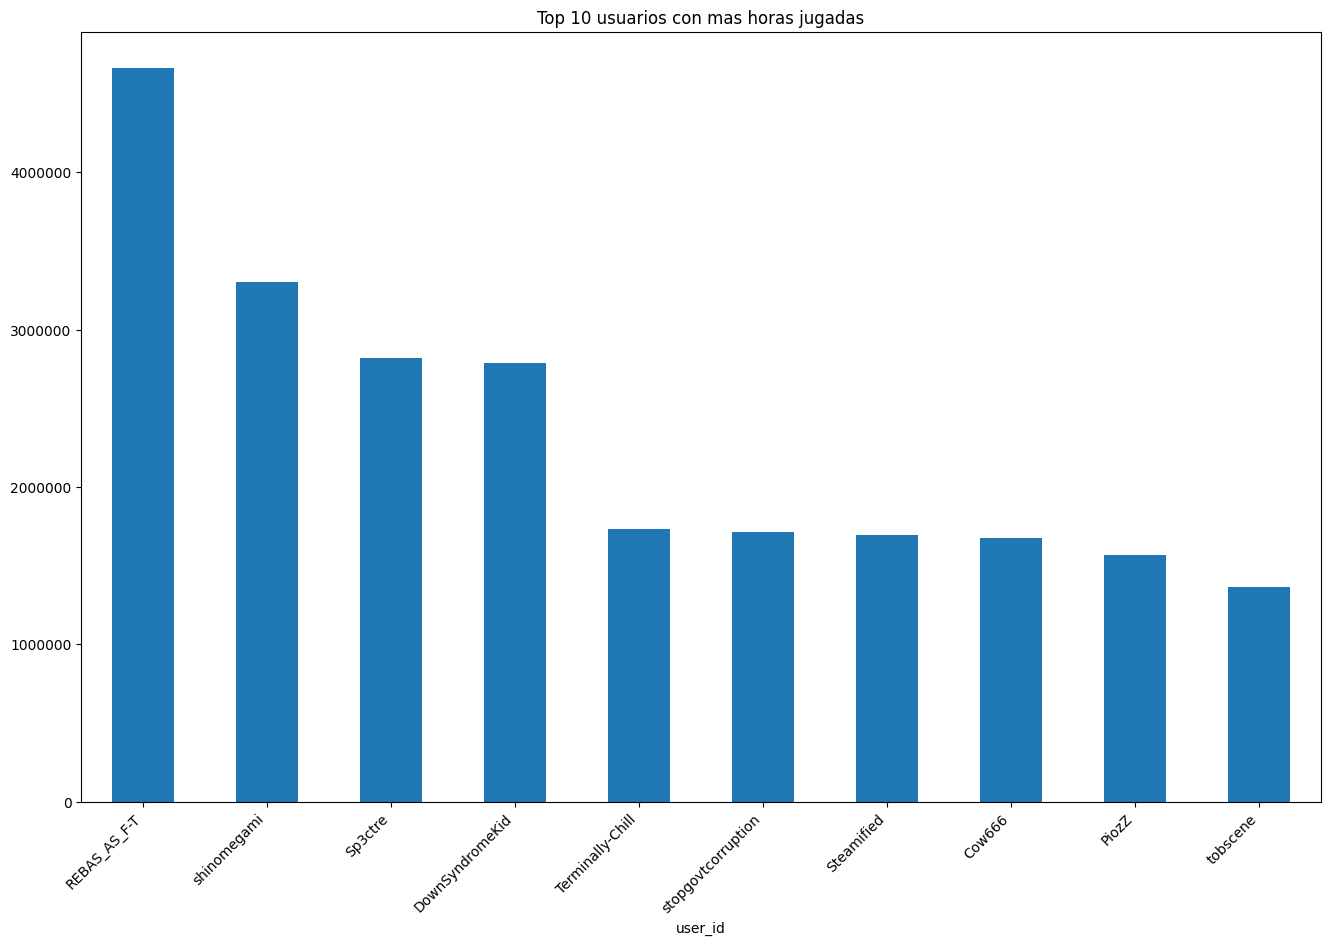

In [133]:
plt.figure(figsize=(16,10))
df_items.groupby('user_id')['playtime_forever'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.xticks(rotation=45,ha='right')
plt.title('Top 10 usuarios con mas horas jugadas')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [132]:
pd.DataFrame(df_items.groupby('user_id')['playtime_forever'].sum().sort_values(ascending=False)[:10])

,playtime_forever
user_id,
REBAS_AS_F-T,4660393
shinomegami,3303502
Sp3ctre,2822860
DownSyndromeKid,2790419
Terminally-Chill,1734007
stopgovtcorruption,1717609
Steamified,1693063
Cow666,1674805
PiozZ,1570365


<Figure size 1600x1000 with 0 Axes>

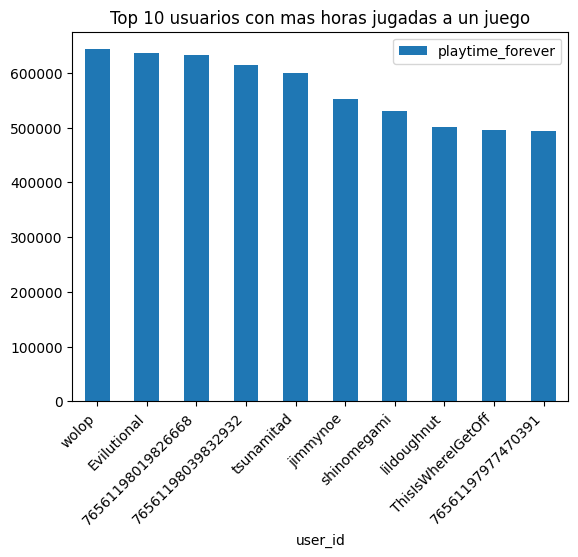

In [138]:
plt.figure(figsize=(16,10))
df_items.sort_values('playtime_forever',ascending=False)[:10].plot(kind='bar',x='user_id')
plt.xticks(rotation=45,ha='right')
plt.title('Top 10 usuarios con mas horas jugadas a un juego')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### item_id

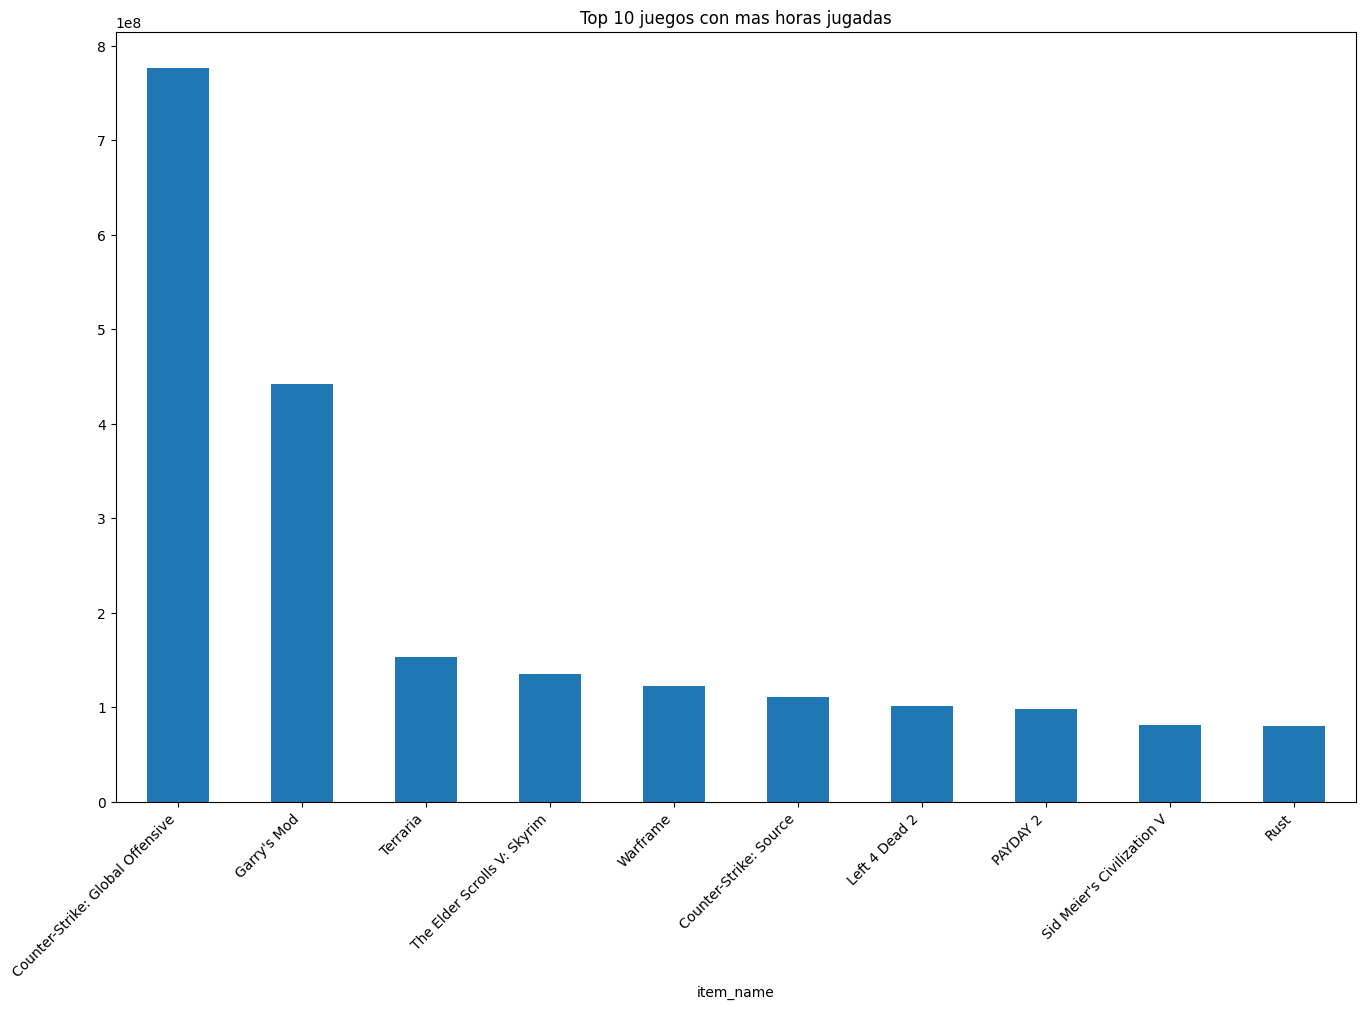

In [129]:
plt.figure(figsize=(16,10))
df_items.groupby('item_name')['playtime_forever'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.xticks(rotation=45,ha='right')
plt.title('Top 10 juegos con mas horas jugadas')
plt.show()

In [134]:
pd.DataFrame(df_items.groupby('item_name')['playtime_forever'].sum().sort_values(ascending=False)[:10])

,playtime_forever
item_name,
Counter-Strike: Global Offensive,775918724
Garry's Mod,441871026
Terraria,152997644
The Elder Scrolls V: Skyrim,134851450
Warframe,122726853
Counter-Strike: Source,111314706
Left 4 Dead 2,101191416
PAYDAY 2,98405781
Sid Meier's Civilization V,81187409


### playtime_forever

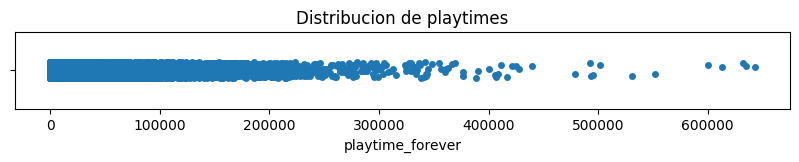

In [135]:
plt.figure(figsize=(10,1))
sns.stripplot(data=df_items,x='playtime_forever')
plt.title('Distribucion de playtimes')
plt.show()

Vemos que hay una tendencia a tener muchos usuarios con relativamente pocas horas jugadas, sin embargo, existen usuarios que se han dedicado mucho a jugar a un juego especifico, por fuera de la norma (600.000 horas o mas).

## Eleccion de variables para modelo de recomendacion

El objetivo del modelo de recomendacion es:
<ul><li>def recomendacion_juego( id de producto ): Ingresando el id de producto, deberíamos recibir una lista con 5 juegos recomendados similares al ingresado.</li>
<li>def recomendacion_usuario( id de usuario ): Ingresando el id de un usuario, deberíamos recibir una lista con 5 juegos recomendados para dicho usuario.</li></ul>

Entonces, podemos intuir que vamos a necesitar un puntaje de los juegos (recommend + sentiment_analysis?) y cierta caracterizacion de los mismos como el genero y el titulo para pode vincular coincidencias. De este modo, el sistema filtrara coincidencias y luego data los 5 mejores juegos de dicho set de datos.

Veamos como hacer ese puntaje uniforme para todos los juegos, tenemos una variable binaria y un analisis de sentimientos de 3 valores: 2x3 = 6 posibles combinaciones:

<ul><li>Valor 1: sin recomendacion y sentimiento negativo</li>
<li>Valor 2: con recomendacion y sentimiento negativo</li>
<li>Valor 3: sin recomendacion y sentimiento neutral</li>
<li>Valor 4: con recomendacion y sentimiento neutral</li>
<li>Valor 5: sin recomendacion y sentimiento positivo</li>
<li>Valor 6: con recomendacion y sentimiento positivo</li>

In [141]:
def puntaje(registro):
    if registro['sentiment_analysis'] == 0:
        if registro['recommend'] == False:
            return 1
        else:
            return 2
    elif registro['sentiment_analysis'] == 1:
        if registro['recommend'] == False:
            return 3
        else:
            return 4
    elif registro['sentiment_analysis'] == 2:
        if registro['recommend'] == False:
            return 5
        else:
            return 6

In [143]:
df_reviews['puntaje'] = df_reviews.apply(puntaje,axis=1)
df_reviews.head()

,user_id,item_id,recommend,posted,sentiment_analysis,puntaje
0,76561197970982479,1250,True,"Posted November 5, 2011.",1,4
1,76561197970982479,22200,True,"Posted July 15, 2011.",2,6
2,76561197970982479,43110,True,"Posted April 21, 2011.",1,4
3,js41637,251610,True,"Posted June 24, 2014.",1,4
4,js41637,227300,True,"Posted September 8, 2013.",1,4


In [144]:
seleccion = ['user_id','item_id','puntaje']
df_reviews = df_reviews[seleccion]
df_reviews

,user_id,item_id,puntaje
0,76561197970982479,1250,4
1,76561197970982479,22200,6
2,76561197970982479,43110,4
3,js41637,251610,4
4,js41637,227300,4
...,...,...,...
58426,76561198312638244,70,6
58427,76561198312638244,362890,4
58428,LydiaMorley,273110,4
58429,LydiaMorley,730,6


Armemos ahora una base de datos unificada con las reviews + nombre de items.

In [146]:
df_items_short = df_items[['item_id','item_name']].drop_duplicates()
df_items_short

,item_id,item_name
0,10,Counter-Strike
1,20,Team Fortress Classic
2,30,Day of Defeat
3,40,Deathmatch Classic
4,50,Half-Life: Opposing Force
...,...,...
4854174,375450,NOBUNAGA'S AMBITION: Souzou SengokuRisshiden
5033865,353390,Alienware Steam Machine
5045944,354280,ChaosTower
5060350,433920,Aveyond 4: Shadow Of The Mist


Nos interesa saber si hay juegos que tienen reviews pero no fueron jugados:

In [147]:
df_rev_it = df_reviews.merge(df_items_short,on='item_id',how='left')
md.tipo_datos(df_rev_it)

,Columna,Tipo_datos,%_nulos,Nulos
0,user_id,[str],0.000000,0
1,item_id,[str],0.000000,0
2,puntaje,[int],0.000000,0
3,item_name,"[str, float]",12.386759,6440


In [190]:
df_vacios = df_rev_it[df_rev_it.isnull().any(axis=1)]
df_vacios.item_id[df_vacios['item_name'].isnull()].unique()

array(['440', '570', '1840', '399730', '410', '17520', '388520', '314130',
       '437701', '234792', '208812', '401650', '419070', '259080', '630',
       '401920', '435881', '490650', '421770', '393010', '318420',
       '17700', '374301', '366660', '405170', '378648', '323500',
       '435870', '351555', '404090', '332350', '48705', '320350',
       '397610', '72840', '450660', '24200', '387440', '207620', '275700',
       '6950', '261820', '358150', '211720', '55475', '412332', '42719',
       '457197', '204372', '330710', '261980', '364323', '461244',
       '323140', '245176', '34350', '323210', '438690', '230940',
       '223770', '456280', '215256', '245910', '113204', '17510',
       '325724', '22110', '35110', '404013', '436090', '235780', '418010',
       '4780', '231250', '355960', '322070', '313371', '449980', '234772',
       '206521', '220760', '399834', '71165', '351890', '33310', '353830',
       '398913', '323910', '259381', '348090', '374300', '384021',
       '38402

In [191]:
df_rev_it[df_rev_it['item_id']=='435881']

,user_id,item_id,puntaje,item_name
812,darkmassieh,435881,6,NaN
3241,usaidwotnow,435881,4,NaN
13314,Doweis,435881,4,NaN
19564,TomYoko,435881,4,NaN


In [194]:
print(f'Juegos con reviews pero sin playtime: {df_vacios.item_id.unique().shape[0]}')

Juegos con reviews pero sin playtime: 361


Estos juegos no tienen palytime pero si review, asi que los eliminaremos porque no podemos saber si la informacion es fraudulenta.

In [197]:
df_rev_it.dropna(subset=['item_name'],inplace=True)

In [200]:
print(f'Total de registros: {df_rev_it.shape[0]}')

Total de registros: 51991


In [201]:
md.tipo_datos(df_rev_it)

,Columna,Tipo_datos,%_nulos,Nulos
0,user_id,[str],0.0,0
1,item_id,[str],0.0,0
2,puntaje,[int],0.0,0
3,item_name,[str],0.0,0


In [202]:
df_rev_it.to_parquet('Datasets/parquet/Recomendacion/recomendacion.parquet',index=False)